## Linear fitting example

We'll explore linear fits in Python for an artificial problem in spectroscopy: given two spectra from pure samples A and B, find the linear combination that best matches a third spectrum, known to be a mixture of the other two substances.

We first load some standard packages, and `linalg.lstsq` is used for the linear fit.

In [1]:
import numpy as np
from numpy import exp, pi, sqrt, linspace
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

### Standard straight line fit

We first illustrate the typical example of fitting a straight line to a few datapoints.

In [2]:
x = np.array([0, 1, 2, 3])

y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T

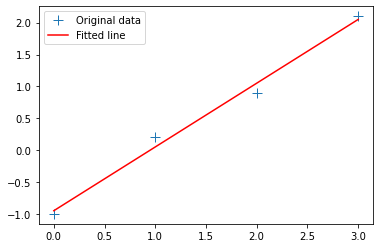

In [3]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

plt.plot(x, y, '+', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

### Artificial dataset

For our spectroscopy example we'll generate dummy data in the form of two noisy peaks with lorentzian lineshape. The third spectrum has a mixture of both peaks, and might correspond to a measurement where the two pure substances A and B were present. We also add a vertical offset that might be an unknown background source.

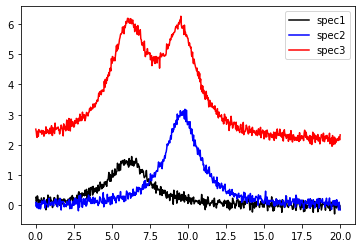

In [4]:
from lmfit.lineshapes import gaussian, lorentzian
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

spec1 = lorentzian(x, 7, 6.1, 1.5) + np.random.normal(scale=0.1, size=x.size)
spec2 = lorentzian(x, 12, 9.6, 1.25) + np.random.normal(scale=0.1, size=x.size)
spec3 = (lorentzian(x, 13, 9.55, 1.252) + lorentzian(x, 17, 6.12, 1.51)) + 2.1 +np.random.normal(scale=0.1, size=x.size)


plt.plot(x, spec1, 'k', label='spec1')
plt.plot(x, spec2, 'b', label='spec2')
plt.plot(x, spec3, 'r', label='spec3')
plt.legend()

Fitting such data is very simple: we just need to form a linear system $AB=Y$ and call `linalg.lstsq` to solve for the unknown `B`:

In [5]:
A = np.vstack([spec1, spec2, np.ones(len(x))]).T
B = np.linalg.lstsq(A, spec3, rcond=None)[0]
B

array([2.30046052, 1.08160071, 2.15340051])

The best-fit coefficients can now be used to predict the linear combination of spec1, spec2, and the constant background:

In [6]:
predicted = np.matmul(A,B)

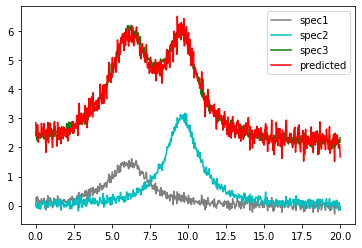

In [7]:
plt.plot(x, spec1, 'grey', label='spec1')
plt.plot(x, spec2, 'c', label='spec2')
plt.plot(x, spec3, 'g', label='spec3')
plt.plot(x, predicted, 'r', label='predicted')
plt.legend()

We can extend this procedure to more linear terms, for example adding a linear background:

In [8]:
spec_unknown = spec3 - 0.23 * x


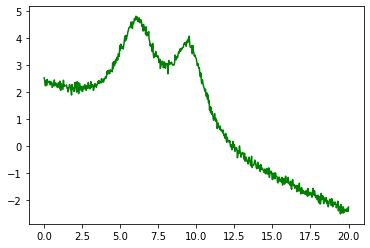

In [9]:
plt.plot(x, spec_unknown, 'g', label='unknown')

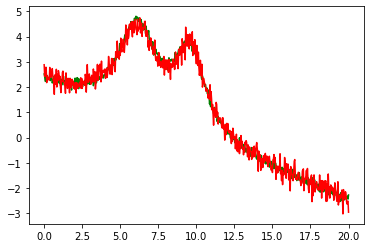

In [10]:
A = np.vstack([x, spec1, spec2, x, np.ones(len(x))]).T
B = np.linalg.lstsq(A, spec_unknown, rcond=None)[0]
predicted = np.matmul(A,B)
plt.plot(x, spec_unknown, 'g', label='unknown')
plt.plot(x, predicted, 'r', label='predicted')

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys345/fitting_01_linear.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys345/fitting_01_linear.py)._